
# COURSE: Neural signal processing and analysis: Zero to hero

SESSION: Introduction #16. MATLAB: EEG Dataset AND Introduction #17. MATLAB: V1 Laminar

TEACHER: Mike X Cohen, sincxpress.com

Originally translated to Python by dxganta.

**Goal:** Become familiar with the sample data used in class

Before beginning, make sure to *import* these libraries below. This loads extra functions into our workspace, which we will be using later.

In [ ]:
import sys
sys.path.insert(1, '../') #used to so that we can find our custom utils library later

# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from utils import * #contains plot_simEEG, topoPlotIndie, time_to_id

## Start with the EEG Data - Exploring the Data

Our first command is `eeg_data = loadmat('path/to/data.mat')`, which reads the named file and loads it into our workspace (we named it `eeg_data`). To work with the data, we need to access the actual eeg data within this file, which we do with a *dictionary access* `eeg = eeg_data["EEG"]`. Now we can easily access the eeg data later, by using the variable `eeg`.

In [ ]:
# Load the sample EEG data. 
eeg_data = loadmat('../data/sampleEEGdata.mat') #loads the .mat file as a dictionary
eeg = eeg_data['EEG'] #access the actual EEG data within the loaded matlab file

Now, we can explore a bit.... Cohen asks you the following questions....

- what are the different fields? *(i.e. what does `eeg` contain?)*
- what is the size of the data?
- how many channels/timepoints/trials?
- where is time = 0?
- what is the sampling rate?

In [74]:
# what are the different fields?
# this is a simple question in the matlab version
# but unfortunately a bit messy with this data in Python
for field in eeg.dtype.fields.keys():
    print(f"{field}: {eeg[field]}")

setname: [[array(['EEG sample dataset'], dtype='<U18')]]
filename: [[array([], dtype='<U1')]]
filepath: [[array([], dtype='<U1')]]
subject: [[array([], dtype='<U1')]]
group: [[array([], dtype='<U1')]]
condition: [[array([], dtype='<U1')]]
session: [[array([], shape=(0, 0), dtype=uint8)]]
comments: [[array(['Parent dataset: 15june2                                        ',
         '                                                               ',
         'Parent dataset "15june2": ----------                           ',
         'Original file: /Users/mcohen1/Desktop/simondata/raw/15june2.bdf'],
        dtype='<U63')                                                       ]]
nbchan: [[array([[64]], dtype=uint8)]]
trials: [[array([[99]], dtype=uint8)]]
pnts: [[array([[640]], dtype=uint16)]]
srate: [[array([[256]], dtype=uint16)]]
xmin: [[array([[-1]], dtype=int16)]]
xmax: [[array([[1.49609375]])]]
times: [[array([[-1000.     ,  -996.09375,  -992.1875 ,  -988.28125,  -984.375  ,
         

In [76]:
#or just print the field names and inspect them separately
print(eeg.dtype.fields.keys())

dict_keys(['setname', 'filename', 'filepath', 'subject', 'group', 'condition', 'session', 'comments', 'nbchan', 'trials', 'pnts', 'srate', 'xmin', 'xmax', 'times', 'data', 'icaact', 'icawinv', 'icasphere', 'icaweights', 'icachansind', 'chanlocs', 'urchanlocs', 'chaninfo', 'ref', 'event', 'urevent', 'eventdescription', 'epoch', 'epochdescription', 'reject', 'stats', 'specdata', 'specicaact', 'splinefile', 'icasplinefile', 'dipfit', 'history', 'saved', 'etc', 'spedata'])


In [82]:
# how many channels/timepoints/trials?
print(eeg['nbchan']) #number of channels
print(eeg['trials']) #number of trials
print(eeg['pnts']) #timepoints per trial


[[array([[64]], dtype=uint8)]]
[[array([[99]], dtype=uint8)]]
[[array([[640]], dtype=uint16)]]


In [83]:
# what was the sampling rate?
print(eeg['srate']) #sampling rate in Hz

[[array([[256]], dtype=uint16)]]


In [86]:
#what are xmin and xmax?
#these are the x axis minimum and maximum (useful for plotting)
# these are measured in seconds
print(eeg['xmin'])
print(eeg['xmax'])

[[array([[-1]], dtype=int16)]]
[[array([[1.49609375]])]]


In [94]:
#what is 'times'? how is it similar to the timepoints?
print(eeg['times'])
print(len(eeg['times'][0][0][0]))

[[array([[-1000.     ,  -996.09375,  -992.1875 ,  -988.28125,  -984.375  ,
           -980.46875,  -976.5625 ,  -972.65625,  -968.75   ,  -964.84375,
           -960.9375 ,  -957.03125,  -953.125  ,  -949.21875,  -945.3125 ,
           -941.40625,  -937.5    ,  -933.59375,  -929.6875 ,  -925.78125,
           -921.875  ,  -917.96875,  -914.0625 ,  -910.15625,  -906.25   ,
           -902.34375,  -898.4375 ,  -894.53125,  -890.625  ,  -886.71875,
           -882.8125 ,  -878.90625,  -875.     ,  -871.09375,  -867.1875 ,
           -863.28125,  -859.375  ,  -855.46875,  -851.5625 ,  -847.65625,
           -843.75   ,  -839.84375,  -835.9375 ,  -832.03125,  -828.125  ,
           -824.21875,  -820.3125 ,  -816.40625,  -812.5    ,  -808.59375,
           -804.6875 ,  -800.78125,  -796.875  ,  -792.96875,  -789.0625 ,
           -785.15625,  -781.25   ,  -777.34375,  -773.4375 ,  -769.53125,
           -765.625  ,  -761.71875,  -757.8125 ,  -753.90625,  -750.     ,
           -746.09375,  -

In [97]:
#where is the data?
print(eeg['data'])
print(eeg['data'][0][0].shape)

[[array([[[ -9.139749  ,  16.477528  ,   3.699142  , ...,   4.3260565 ,
            -4.3482246 ,  -5.194303  ],
          [-14.634847  ,  17.774162  ,   9.062452  , ...,   6.806118  ,
            -5.9413395 ,  -8.060487  ],
          [-10.460827  ,  17.490477  ,  10.576109  , ...,   2.9304078 ,
            -0.54933196, -14.141826  ],
          ...,
          [-12.104717  ,  -9.6605015 ,  -3.8145106 , ..., -19.892828  ,
            -0.92024845,  -9.057399  ],
          [-23.110184  ,  -2.6814282 ,  -1.2646698 , ..., -17.914955  ,
             4.2044597 ,  -7.750154  ],
          [-11.397936  ,  -3.0929358 ,   3.6921718 , ..., -15.427801  ,
             2.5216131 ,  -7.6499906 ]],

         [[ -8.072053  ,  13.516753  ,   5.4470987 , ...,  -2.2567065 ,
            -7.317681  , -12.988661  ],
          [ -7.2163615 ,   9.273253  ,  12.698048  , ..., -14.871685  ,
           -13.629048  , -27.050558  ],
          [ -5.4041333 ,  11.426121  ,  11.577604  , ..., -15.201724  ,
            -6.

In [117]:
#what is chanlocs?
print(eeg['chanlocs'])
eeg['chanlocs'][0][0].shape

[[array([[(array(['Fp1'], dtype='<U3'), array([[-17.926]]), array([[0.51498889]]), array([[80.78401377]]), array([[26.1330144]]), array([[-4.00108454]]), array([[17.926]]), array([[-2.698]]), array([[85]], dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([[1]], dtype=uint8)),
          (array(['AF7'], dtype='<U3'), array([[-35.892]]), array([[0.52233333]]), array([[68.69107635]]), array([[49.70943131]]), array([[-5.95889823]]), array([[35.892]]), array([[-4.02]]), array([[85]], dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([[2]], dtype=uint8)),
          (array(['AF3'], dtype='<U3'), array([[-22.461]]), array([[0.42112778]]), array([[76.15276677]]), array([[31.4827968]]), array([[20.84681317]]), array([[22.461]]), array([[14.197]]), array([[85]], dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([[3]], dtype=uint8)),
          (array(['F1'], dtype='<U2'), array([[-23.493]]), array([[0.27902778]]), array([[59.91273024]]), array([[26.04209339]]), array([[54.3

(1, 64)

In [124]:
# let's inspect chanlocs more deeply....
print(eeg['chanlocs'][0][0].dtype.fields.keys())

dict_keys(['labels', 'theta', 'radius', 'X', 'Y', 'Z', 'sph_theta', 'sph_phi', 'sph_radius', 'type', 'urchan'])


In [128]:
#look at only 1 channel, how about channel 10
#MATLAB STARTS COUNTING AT 1, PYTHON STARTS COUNTING AT 0
# so channel 10 in matlab is channel 9 in python
print(eeg['chanlocs'][0][0][0][9])
for field in eeg['chanlocs'][0][0].dtype.fields.keys():
    print(f"{field}: {eeg['chanlocs'][0][0][0][9][field]}")

(array(['FC3'], dtype='<U3'), array([[-62.425]]), array([[0.28822222]]), array([[30.95528495]]), array([[59.27497818]]), array([[52.47139502]]), array([[62.425]]), array([[38.12]]), array([[85]], dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([[10]], dtype=uint8))
labels: ['FC3']
theta: [[-62.425]]
radius: [[0.28822222]]
X: [[30.95528495]]
Y: [[59.27497818]]
Z: [[52.47139502]]
sph_theta: [[62.425]]
sph_phi: [[38.12]]
sph_radius: [[85]]
type: []
urchan: [[10]]


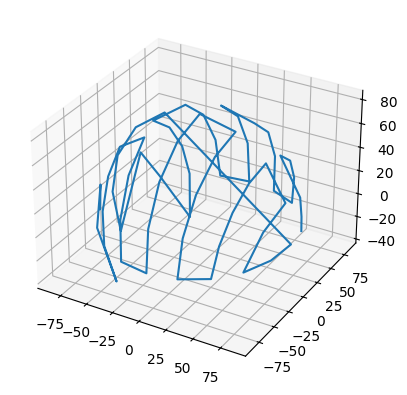

In [146]:
#plotting chanlocs
ax = plt.figure().add_subplot(projection='3d')
x = [float(eeg['chanlocs'][0][0][0][i]["X"][0][0]) for i in range(int(eeg['nbchan'][0][0][0][0]))]
y = [float(eeg['chanlocs'][0][0][0][i]["Y"][0][0]) for i in range(int(eeg['nbchan'][0][0][0][0]))]
z = [float(eeg['chanlocs'][0][0][0][i]["Z"][0][0]) for i in range(int(eeg['nbchan'][0][0][0][0]))]
ax.plot(x,y,z)
#you cannot rotate this figure like he does in matlab

## Plotting ERPs and topographical maps

In [ ]:
# Compute the ERP of each channel
# (remember that the ERP is the time-domain average across all trials at each time point)
erp = np.mean(eeg['data'][0][0], axis=2)
eeg_times = eeg['times'][0][0].T

Now, pick a channel and plot the ERP

(-400.0, 1200.0)

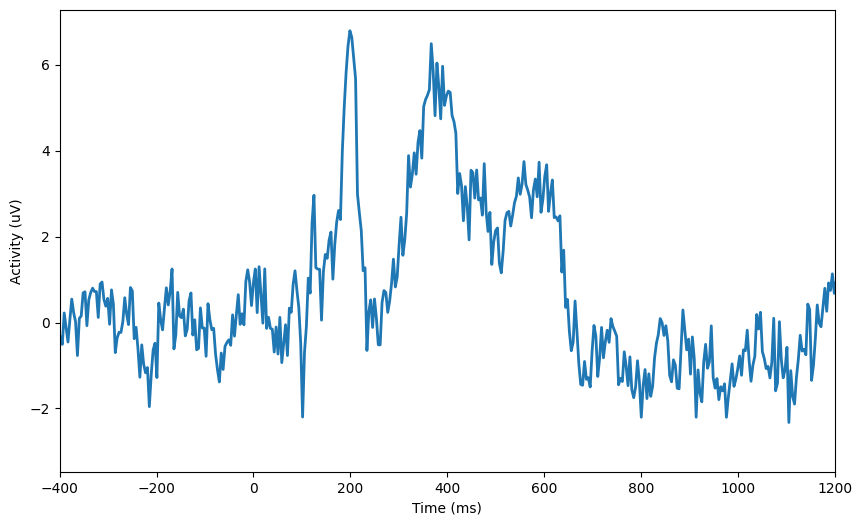

In [149]:
chan2plot = 'fcz'
chanlocs = []
for i in eeg['chanlocs'][0][0]['labels'][0]:
    chanlocs.append(i[0].lower())
chanlocs = np.array(chanlocs)

chan_idx = np.where(chanlocs == chan2plot)[0][0] #this is the replacement for "strcmpi" that Cohen points out

plt.figure(figsize=(10,6))
plt.plot(eeg_times, erp[chan_idx], linewidth=2)
plt.xlabel('Time (ms)'), plt.ylabel('Activity (uV)')
plt.xlim([-400, 1200])

Instead of plotting all the timepoints for 1 electrode, let's plot 1 timepoint for all the electrodes.

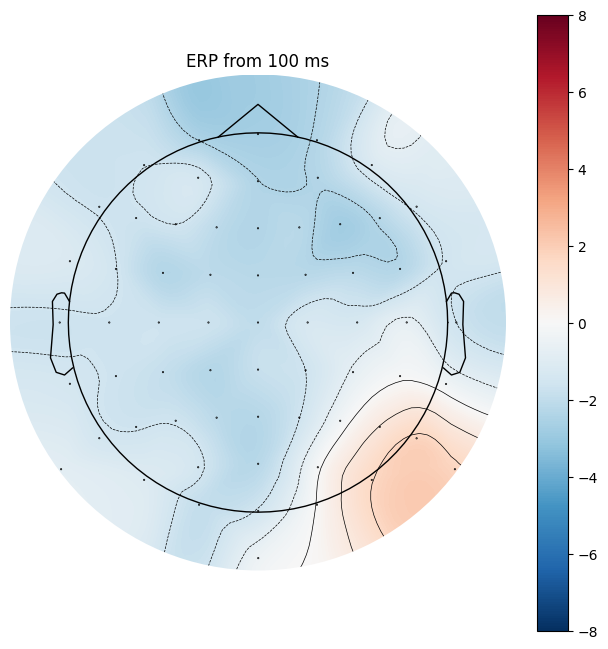

In [154]:
# Plot topographical maps
time2plot = 100 # in ms
# convert time in ms to time in indices
tidx = np.argmin(np.abs(eeg_times - time2plot))
topoPlotIndie(eeg, erp[:, tidx], 'ERP from {} ms'.format(time2plot),vlim=(-8,8)) #this custom utils function uses plot_topomap from mne.viz

## Now for sample CSD V1 Data

Lecture "17-MATLAB: V1 dataset" begins here

In [6]:
# load the laminar data
laminar_data = loadmat('../data/v1_laminar.mat')

(-0.1, 1.4)

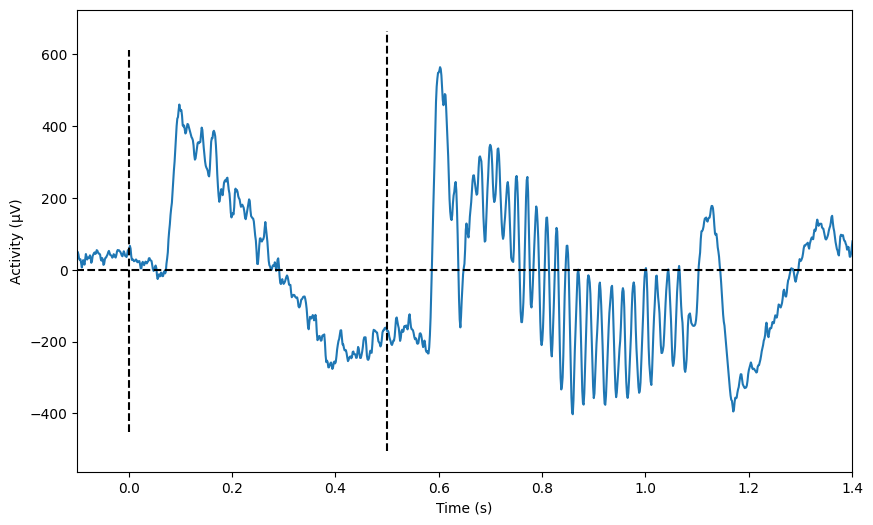

In [7]:
# Extract variables from the loaded mat file
csd = laminar_data['csd']
timevec = laminar_data['timevec']

# Plot ERP from channel 7
plt.figure(3, figsize=(10,6))
plt.plot(timevec.T, np.mean(csd[6, :, :], axis=1))
plt.plot(plt.gca().get_xlim(), [0, 0], 'k--')
plt.plot([0, 0], plt.gca().get_ylim(), 'k--')
plt.plot(np.array([0, 0]) + 0.5, plt.gca().get_ylim(), 'k--')
plt.xlabel('Time (s)')
plt.ylabel('Activity (\u03BCV)')
plt.xlim(-0.1, 1.4)

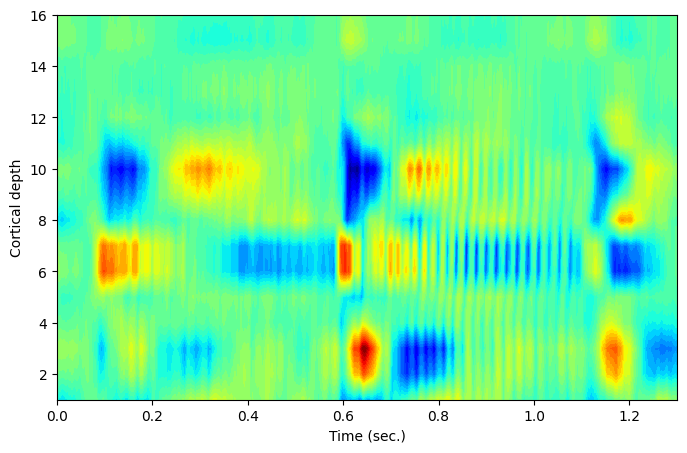

In [8]:
X = timevec
Y = np.arange(1,17)
Z = np.squeeze(np.mean(csd, axis=2))

# Plot depth-by-time image of ERP
plt.figure(4, figsize=(8,5))
plt.contourf(X.reshape((1527,)), Y, Z, 40, cmap='jet')
plt.xlim(0, 1.3)
plt.xlabel('Time (sec.)')
plt.ylabel('Cortical depth')

# Show the plots
plt.show()